In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dynamic-relationship-expansion-dre/pytorch/organized-chaos/2/dynamic-relationship-expansion-dre
/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json
/kaggle/input/arc-prize-2024/sample_submission.json
/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json
/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json


Captured changes for Training Example 0:
Scaled Input:
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


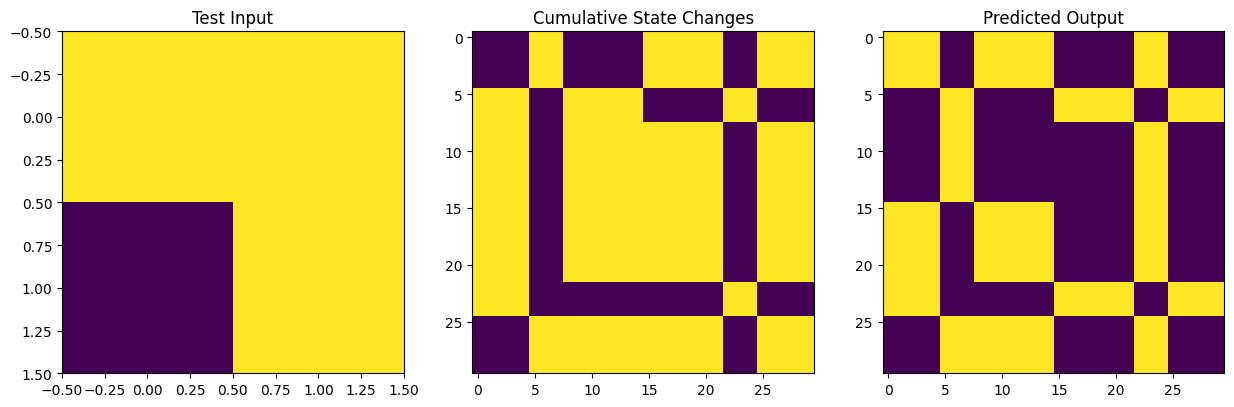

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

TARGET_SIZE = (30, 30)  # Define the target size for consistent scaling

# Function to scale an input to the target size
def scale_to_target(matrix):
    scaling_factor = (TARGET_SIZE[0] / matrix.shape[0], TARGET_SIZE[1] / matrix.shape[1])
    return zoom(matrix, scaling_factor, order=0)

# Function to capture cumulative state changes from training data
def capture_state_changes(train_inputs, train_outputs):
    # Initialize the state change matrix as a neutral matrix (zeros)
    state_change_matrix = np.zeros(TARGET_SIZE, dtype=int)
    
    # Iterate through each pair of scaled training inputs and outputs
    for i, (input_matrix, output_matrix) in enumerate(zip(train_inputs, train_outputs)):
        # Scale input and output to the target size
        scaled_input = scale_to_target(input_matrix)
        scaled_output = scale_to_target(output_matrix)
        
        # Compute the state changes (where input and output differ)
        changes = (scaled_output != scaled_input).astype(int)
        
        # Accumulate these changes into the state change matrix
        state_change_matrix += changes
        
        print(f"Captured changes for Training Example {i}:")
        print(f"Scaled Input:\n{scaled_input}")
        print(f"Scaled Output:\n{scaled_output}")
        print(f"Detected Changes:\n{changes}")
        print("-" * 50)
    
    # Since multiple transformations may overlap, apply modulo 2 to only capture the final state
    state_change_matrix %= 2  # Ensures we're left with 0 or 1 states
    
    print("Final Cumulative State Change Matrix:")
    print(state_change_matrix)
    print("=" * 50)
    
    return state_change_matrix

# Function to apply the cumulative state change matrix to a test input
def apply_state_changes(test_input, state_change_matrix):
    # Scale test input to the target size
    scaled_test_input = scale_to_target(test_input)
    
    print("Initial Scaled Test Input:")
    print(scaled_test_input)
    
    # Apply the cumulative state change matrix
    final_output = (scaled_test_input + state_change_matrix) % 2  # Flip based on state changes
    
    print("Final Predicted Output after applying state changes:")
    print(final_output)
    
    return final_output

# Sample task data for testing
train_inputs = [
    np.array([[1, 1], [0, 0]]),
    np.array([[1, 1, 0], [0, 1, 1], [1, 0, 1]]),
    np.array([[0, 1], [1, 0]]),
    np.array([[1, 0, 0], [0, 1, 1]])
]

train_outputs = [
    np.array([[1, 0, 0, 1], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0]]),
    np.array([[1, 0, 1], [0, 0, 0], [1, 0, 1]]),
    np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]),
    np.array([[1, 1, 1, 1], [0, 0, 1, 1], [1, 1, 0, 0]])
]

test_input = np.array([[1, 1], [0, 1]])

# Capture state changes from training data
state_change_matrix = capture_state_changes(train_inputs, train_outputs)

# Apply state changes to the test input
predicted_output = apply_state_changes(test_input, state_change_matrix)

# Display the final predicted output
print("Predicted Output:")
print(predicted_output)

# Visualize the transformation sequence
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(test_input, cmap='viridis')
axes[0].set_title("Test Input")

axes[1].imshow(state_change_matrix, cmap='viridis')
axes[1].set_title("Cumulative State Changes")

axes[2].imshow(predicted_output, cmap='viridis')
axes[2].set_title("Predicted Output")
plt.show()

Captured changes for Training Example 0:
Scaled Input:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0]


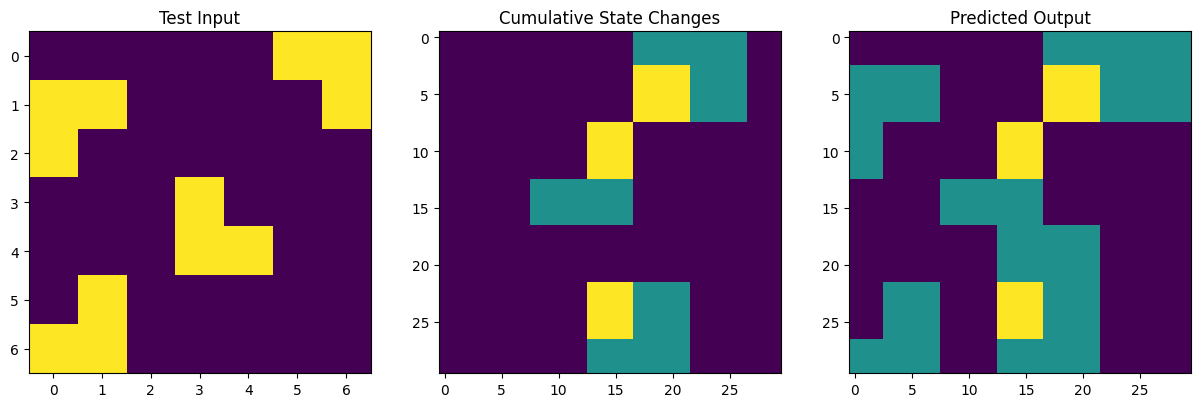

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

TARGET_SIZE = (30, 30)  # Define the target size for consistent scaling

# Function to scale an input to the target size
def scale_to_target(matrix):
    scaling_factor = (TARGET_SIZE[0] / matrix.shape[0], TARGET_SIZE[1] / matrix.shape[1])
    return zoom(matrix, scaling_factor, order=0)

# Function to capture cumulative state changes with color tracking
def capture_state_changes(train_inputs, train_outputs):
    # Initialize the state change matrix as a neutral matrix (zeros)
    state_change_matrix = np.zeros(TARGET_SIZE, dtype=int)
    
    # Iterate through each pair of scaled training inputs and outputs
    for i, (input_matrix, output_matrix) in enumerate(zip(train_inputs, train_outputs)):
        # Scale input and output to the target size
        scaled_input = scale_to_target(input_matrix)
        scaled_output = scale_to_target(output_matrix)
        
        # Compute where there are changes and update the state change matrix with output values
        changes = (scaled_output != scaled_input)
        state_change_matrix = np.where(changes, scaled_output, state_change_matrix)
        
        print(f"Captured changes for Training Example {i}:")
        print(f"Scaled Input:\n{scaled_input}")
        print(f"Scaled Output:\n{scaled_output}")
        print(f"Detected Changes:\n{changes.astype(int)}")  # Display as binary changes
        print("-" * 50)
    
    print("Final Cumulative State Change Matrix with Colors:")
    print(state_change_matrix)
    print("=" * 50)
    
    return state_change_matrix

# Function to apply the cumulative state change matrix to a test input
def apply_state_changes(test_input, state_change_matrix):
    # Scale test input to the target size
    scaled_test_input = scale_to_target(test_input)
    print("Initial Scaled Test Input:")
    print(scaled_test_input)
    
    # Apply the cumulative state change matrix
    final_output = np.where(state_change_matrix != 0, state_change_matrix, scaled_test_input)
    
    print("Final Predicted Output after applying state changes with colors:")
    print(final_output)
    
    return final_output

# Replace these arrays with the ARC data examples
train_inputs = [
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 1, 2, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 2, 1, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]
    ])
]

train_outputs = [
    np.array([
        [0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 2, 1, 0],
        [0, 0, 1, 2, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 2, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0]
    ])
]

test_input = np.array([
    [0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0]
])

# Capture state changes from training data
state_change_matrix = capture_state_changes(train_inputs, train_outputs)

# Apply state changes to the test input
predicted_output = apply_state_changes(test_input, state_change_matrix)

# Display the final predicted output
print("Predicted Output:")
print(predicted_output)

# Visualize the transformation sequence
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(test_input, cmap='viridis')
axes[0].set_title("Test Input")

axes[1].imshow(state_change_matrix, cmap='viridis')
axes[1].set_title("Cumulative State Changes")

axes[2].imshow(predicted_output, cmap='viridis')
axes[2].set_title("Predicted Output")
plt.show()

# All I needed to do was subtract the test input from the output... 